In [17]:
import tensorflow as tf

from tensorflow import keras

tf.__version__

import os 
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="6"

In [18]:
import pandas as pd
import numpy as np

In [19]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [20]:
print("X_train_full 행렬의 모양 :",X_train_full.shape)
print("X_train_full의 데이터 타입 :",X_train_full.dtype)

X_train_full 행렬의 모양 : (60000, 28, 28)
X_train_full의 데이터 타입 : uint8


In [21]:
X_valid,X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

X_test=X_test/255.0

In [22]:
class_names=["T-shit/top","trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
for i in class_names:
    print(i,end=' ')

T-shit/top trouser Pullover Dress Coat Sandal Shirt Sneaker Bag Ankle boot 

In [23]:
class_names[y_train[0]]
y_train[0]
type(y_train)

numpy.ndarray

### 학습 모델을 구성합니다.


In [24]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))

model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))



#### 이를 한번에 쓸 수도 있다.
 - Sequential : 간단한 케라스의 신경망 모델입니다. 
 - Flatten : 입력 이미지를 전체 1차원 배열로 변환합니다. X.shape(-1,28^2)로 변환
 - Dense : n개의 층을 가진 신경망을 만듭니다. 그리고 은닉층의 활성함수를 지정합니다.
 - 마지막으로 클래스마다 하나씩 뉴런 10개를 가진 Dense 출력층을 추가합니다.
 - 배탁적인 클래스이므로 소프트맥스 활성화 함수를 쓴다.

In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [26]:
from tensorflow import keras

output_layer = keras.layers.Dense(10)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_12 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### 모델 훈련과 평가

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",metrics=["accuracy"])

In [29]:
history = model.fit(X_train,y_train,epochs=30,
validation_data = (X_valid,y_valid))

2021-10-17 20:57:11.115780: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7360 - accuracy: 0.7587 - val_loss: 0.5288 - val_accuracy: 0.8200
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4919 - accuracy: 0.8280 - val_loss: 0.4500 - val_accuracy: 0.8462
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4442 - accuracy: 0.8458 - val_loss: 0.4072 - val_accuracy: 0.8644
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4178 - accuracy: 0.8533 - val_loss: 0.4026 - val_accuracy: 0.8598
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3975 - accuracy: 0.8610 - val_loss: 0.3938 - val_accuracy: 0.8604
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3801 - accuracy: 0.8649 - val_loss: 0.5130 - val_accuracy: 0.8060
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3672 - accuracy: 0.8706 - val_loss: 0.3700 - val_accuracy:

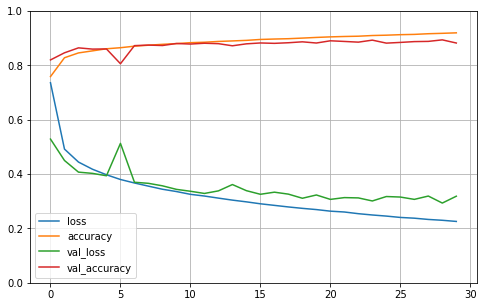

In [30]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))

plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [31]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3604 - accuracy: 0.8697


[0.36037859320640564, 0.869700014591217]

### 모델을 사용하여 예측을 만들기
- 그다음 모델의 predict() 메서드를 사용하여 새로운 샘플에 대한 예측을 만들 수 있습니다.
- 여기에서는 실제로 새로운 샘플이 없기 때문에 테스트 셋의 처음 3개의 샘플을 따로 추출하여 진행하겠씁니다.

In [32]:
X_new = X_test[:3]
X_new.shape

(3, 28, 28)

In [33]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

- 여기에서 볼 수 있듯 각 샘플에 대해 0에서 9까지 클래스마다 각각의 확률을 모델이 추정하였습니다.
- 예를 들어 첫번째 이미지에 대해서는, 클래스 9(앵클부츠)의 확률은 0.99, 클래스 5(샌들)의 확률은 0.01 등등입니다. 
- 다른 클래스의 확률은 거의 무시할 수준입니다. 즉, 
- 첫 번째 이미지는, 신발 종류라고 믿고있으며 거의 앵클부츠에 가깝고, 샌들일 가능성도 조금은 있다는 말입니다. 
- 실제로는 확률값이 낮더라고, 가장 높은 확률을 가진 클래스에만 관심이 있다면, predict_classes() 메서드를 사용할 수 있습니다.

In [34]:
y_pred = model.predict(X_new)
y_pred

array([[1.3653074e-06, 6.9060441e-08, 5.3423236e-07, 1.6689972e-05,
        1.0632142e-06, 1.1237463e-02, 2.8220925e-06, 2.1858331e-02,
        2.7604913e-04, 9.6660554e-01],
       [1.3534808e-04, 6.3073204e-09, 9.8809016e-01, 7.2485612e-08,
        9.2025148e-03, 5.8120748e-12, 2.5715667e-03, 4.4204002e-10,
        2.0482283e-07, 4.4679170e-11],
       [3.8749636e-06, 9.9999368e-01, 4.3331319e-08, 2.0129808e-06,
        3.8166141e-07, 2.3091264e-12, 1.3990742e-08, 1.6138244e-11,
        5.3899214e-09, 9.7011869e-12]], dtype=float32)

In [35]:
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([9, 2, 1])

In [36]:
np.array(class_names)[y_pred]


array(['Ankle boot', 'Pullover', 'trouser'], dtype='<U10')

In [37]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

In [38]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target)

X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

#### 모델 생성

In [39]:
#1. 모델 생성
#30개의 뉴런을 가지고, 활성화 함수는 relu, 그리고 input 모양은 이렇게.
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error",optimizer="sgd")
history = model.fit(X_train,y_train,epochs=20,
validation_data = (X_valid,y_valid))

mse_test = model.evaluate(X_test,y_test)
X_new=X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8321 - val_loss: 0.5898
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5296 - val_loss: 0.5187
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4873 - val_loss: 0.4955
Epoch 4/20
363/363 [==============================] - 0s 999us/step - loss: 0.4838 - val_loss: 0.4807
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4642 - val_loss: 0.4674
Epoch 6/20
363/363 [==============================] - 0s 987us/step - loss: 0.4517 - val_loss: 0.4677
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4516 - val_loss: 0.4622
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4310 - val_loss: 0.4455
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4413 - val_loss: 0.4482
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4288 - val_loss: 0.

#### 함수형 API를 사용해 복잡한 모델 만들기.
- 순차적이지 않은 신경망의 예 : Wide deep 신경망입니다. 
- 입력의 일부 혹은 전체가 출력층에 바로 연결됩니다.
- 이러헤 하면 신경망이, 복잡한 패턴, 간단한 규칙을 모두 학습할 수 있습니다. 

In [40]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
#먼저 input 객체를 만듭니다.. 이 객체는 shape와 dtype을 포함하여 모델의 입력을 정의합니다.
#한 모델은 여러 개의 입력을 가질 수 있습니다.

hidden1 = keras.layers.Dense(30,activation="relu")(input_)
#30개의 뉴런과 relu활성함수를 가진 Dense층을 만듭니다. 
#이 층은 만들어지자마자 입력과 함께 함수처럼 바로 호출됩니다. 
#이를 함수형 API라고 부르는 이유입니다. 
#케라스에 층이 연결될 방법을 알려주었을 뿐, 아직 어떤 데이터도 처리하지 않았습니다.

hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
#두 번째 은닉층을 만들고 함수처럼 호출합니다. 
#연쇄적으로 연결

concat = keras.layers.Concatenate()([input_,hidden2])
#Concatenate 층을 만들고, 또다시 저것들을 함수처럼 호출하여,
#두 번째 은닉층의 출력,입력을 연결합니다. 

output = keras.layers.Dense(1)(concat)
#하나의 뉴런과 활성화 함수가 없는 출력층을 만들고,
#Concatenate 층이 만든 결과를 사용하여 호출합니다.

model = keras.Model(inputs=[input_],outputs=[output])
#마지막으로 사용할 입력과 출력을 각각 지정하여, 케라스 Model을 만듭니다.


#### 만약 일부 특성은 짧은 경로로 전달하고, 다른 특성들은 깊은 경로로 전달하고 싶다면?

1) 여러입력을 사용하기
  - 예를 들어 5개 특성(특성 인덱스 0 ~ 4)을 짧은 경로로 보내고, 
  - 6개 특성(특성 인덱스 2 ~ 7)은 깊은 경로로 보낸다고 가정한다.

In [41]:
input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name="deep_input")

hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name="output")(concat)

model = keras.Model(inputs=[input_A,input_B],outputs=[output])

- 지금은 층의 구조가 단순하지만, 모델이 복잡해지면, 가장 중요한 층에는 이름을 붙이는 것이 좋습니다.
- 모델을 만들 때, inputs=[input_A,input_B]와 같이 지정했습니다만,
- 모델 컴파일은 이전과 동일하지만 fit() 메서드를 호출할 때 하나의 입력 행렬 X_train을 전달하는 것이 아니라, 입력마다 하나씩 행렬의 튜플 (X_train_A,X_train_B)를 전달해야 합니다.
- X_valid에도 동일하게 적용됩니다. evaluate()나 predict()를 호출할 때, 
- X_test와 X_new에도 동일합니다.

In [42]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A,X_train_B = X_train[:,:5],X_train[:,2:]
X_valid_A,X_valid_B = X_valid[:,:5],X_valid[:,2:]
X_test_A,X_test_B = X_test[:,:5],X_test[:,2:]
X_new_A,X_new_B = X_test_A[:3],X_test_B[:3]


history = model.fit((X_train_A,X_train_B),y_train,epochs=20,validation_data=((X_valid_A,X_valid_B),y_valid))

mse_test = model.evaluate((X_test_A,X_test_B),y_test)
y_pred = model.predict((X_new_A,X_new_B))

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.4134 - val_loss: 1.1873
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9163 - val_loss: 0.7906
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7025 - val_loss: 0.6842
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6332 - val_loss: 0.6429
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6014 - val_loss: 0.6189
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5807 - val_loss: 0.6019
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5656 - val_loss: 0.5876
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5540 - val_loss: 0.5761
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5433 - val_loss: 0.5657
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5358 - val_loss: 0.5582

In [43]:
input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name="deep_input")

hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A,hidden2])

output = keras.layers.Dense(1,name="main_output")(concat)
aux_output = keras.layers.Dense(1,name="aux_output")(hidden2)




model = keras.Model(inputs=[input_A,input_B],outputs=[output,aux_output])

In [44]:

model.compile(loss=["mse","mse"], loss_weights=[0.9,0.1],optimizer="sgd")

### 서브클래싱 API로 동적 모델을 만들기

- 간단히 Model 클래스를 상속한 다음, 생성자 안에서 필요한 층을 만듭니다.
- 그 다음 call() 메서드 안에 수행하려는 연산을 기술합니다.
- 예를 들어 다음 WideAndDeepModel 클래스의 한 인스턴스는 앞서 함수형 API로 만든 모델과 동일한 기능을 수행합니다.
- 이전에 했던 것처럼 이 인스턴스를 사용하여 컴파일->훈련->평가->예측을 수행할 수 있습니다.

In [45]:
class WideAndDeepModel(keras.Model):
    def __init__(self,units=30,activation="relu",**kwargs):
        super().__init__(**kwargs) #표준 매개변수를 처리합니다. 예를들어, name
        self.hidden1 = keras.layers.Dense(units,activation=activation)
        self.hidden2 = keras.layers.Dense(units,activation=activation)
        self.main_output=keras.layers.Dense(1)
        self.aux_output=keras.layers.Dense(1)
    
    def call(self,inputs):
        input_A,input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)

        concat = keras.layers.concatenate([input_A,hidden2])

        main_output = self.main_output(concat)
        aux_output=self.aux_output(hidden2)

        return main_output,aux_output


model=WideAndDeepModel()


### 콜백 사용하기.
- 일정한 간격으로 체크포인트를 설정하여
- 대규모의 데이터 학습 시 과부하를 방지

In [46]:
# checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
# history = model.fit(X_train,y_train,epochs=10,callbacks=[checkpoint_cb])

### 신경망 하이퍼파라미터 튜닝하기
- 어떤 하이퍼파라미터 조합이 주어진 문제에 최적인지 알 수 있을까.
- 한 가지 방법은 많은 하이퍼파라미터 조합을 시도해보고, 어떤 것이 검증 세트에서 가장 좋은 점수를 내는지 확인하는 것
- 예를 들어 GridSearchCV나 RandomizedSearchCV를 사용해 하이퍼파라미터 공간을 탐색할 수 있습니다.
- 이렇게 하려면 케라스 모델을 사이킷런 추정기처럼 보이도록 바꿔야.

In [47]:
def build_model(n_hidden=1,n_neurons=30,learning_rate=3e-3,input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))

    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse",optimizer=optimizer)

    return model

- 이 함수는 주어진 입력 크기, 뉴런의 개수로 단변량 회귀를 위한 간단한 Sequential 모델을 만듭니다.
- 그리고 지정된 학습률을 사용하는 SGD optimizer을 모델에 컴파일합니다. 

- 위 Build_model()를 사용해 KerasRegressor 클래스의 객체를 만듭니다.

In [48]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

- KerasRegressor 객체는, build_model() 함수로 만들어진 케라스 모델을 감싸는 간단한 wrapper입니다.(뭐지)
- 이 객체를 만들 때 어떠한 하이퍼파라미터도 넘겨주지 않았으므로, build)model()에 정의된 기본 하이퍼파라미터를 사용할 것입니다.
- 이제 일반적인 사이킷런 회귀 추정기처럼 이 객체를 사용할 수 있습니다.
- 다음 코드와 같이 fit() 메서드로 모델을 훈련하고, score()메서드로 평가하고, predict()메서드로 예측을 만들 수 있습니다.

In [49]:
keras_reg.fit(X_train,y_train,epochs=100,
validation_data=(X_valid,y_valid),
callbacks=[keras.callbacks.EarlyStopping(patience=10)])

mse_test = keras_reg.score(X_test,y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.1864 - val_loss: 0.7089
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6529 - val_loss: 0.6572
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6042 - val_loss: 0.6146
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5705 - val_loss: 0.5822
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5413 - val_loss: 0.5554
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5198 - val_loss: 0.5355
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5051 - val_loss: 0.5213
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4926 - val_loss: 0.5085
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4810 - val_loss: 0.5089
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4769 - val_lo

In [50]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs={
    "n_hidden":[0,1,2,3],
    "n_neurons":np.arange(1,100),

}

rnd_search_cv = RandomizedSearchCV(keras_reg,param_distribs,n_iter=10,cv=3)
rnd_search_cv.fit(X_train,y_train,epochs=100, 
validation_data=(X_valid,y_valid), 
callbacks=[keras.callbacks.EarlyStopping(patience=10)])

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 3.6320 - val_loss: 0.9812
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7220 - val_loss: 0.6299
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5853 - val_loss: 0.6029
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5598 - val_loss: 0.5878
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5496 - val_loss: 0.5790
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5418 - val_loss: 0.5736
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5368 - val_loss: 0.5675
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5325 - val_loss: 0.5604
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5282 - val_loss: 0.5570
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5239 - val_lo

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 2.6071 - val_loss: 0.8207
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6380 - val_loss: 0.5657
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5287 - val_loss: 0.5484
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5209 - val_loss: 0.5452
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5258 - val_loss: 0.5434
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5252 - val_loss: 0.5430
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5263 - val_loss: 0.5421
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5240 - val_loss: 0.5418
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5171 - val_loss: 0.5500
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5301 - val_loss: 0.5433
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 2.9179 - val_loss: 0.9434
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6587 - val_loss: 0.5653
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5334 - val_loss: 0.5449
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5251 - val_loss: 0.5437
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5238 - val_loss: 0.5427
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5235 - val_loss: 0.5424
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5232 - val_loss: 0.5479
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5234 - val_loss: 0.5432
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5231 - val_loss: 0.5443
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5235 - val_loss: 0.5441
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 1.3761 - val_loss: 0.7050
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6569 - val_loss: 0.6686
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5768 - val_loss: 0.5792
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5314 - val_loss: 0.5419
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5014 - val_loss: 0.5183
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4824 - val_loss: 0.4993
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4679 - val_loss: 0.4856
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4578 - val_loss: 0.4755
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4461 - val_loss: 0.4670
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4395 - val_loss: 0.4605
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 1.2039 - val_loss: 0.7278
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6869 - val_loss: 0.6545
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6048 - val_loss: 0.6056
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5595 - val_loss: 0.5683
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5273 - val_loss: 0.5400
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5045 - val_loss: 0.5210
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4821 - val_loss: 0.5052
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4693 - val_loss: 0.4899
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4561 - val_loss: 0.4783
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4468 - val_loss: 0.4708
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 1.2557 - val_loss: 0.6914
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6247 - val_loss: 0.6068
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5619 - val_loss: 0.5567
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5220 - val_loss: 0.5271
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4958 - val_loss: 0.5068
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4785 - val_loss: 0.4928
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4656 - val_loss: 0.4803
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4552 - val_loss: 0.4715
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4475 - val_loss: 0.4647
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4413 - val_loss: 0.4597
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 1.3532 - val_loss: 0.7197
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6593 - val_loss: 0.6536
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5944 - val_loss: 0.6006
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5559 - val_loss: 0.5674
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5263 - val_loss: 0.5415
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5071 - val_loss: 0.5228
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4905 - val_loss: 0.5087
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4786 - val_loss: 0.4968
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4687 - val_loss: 0.4897
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4616 - val_loss: 0.4822
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 1.7684 - val_loss: 0.7484
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7467 - val_loss: 0.6856
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6296 - val_loss: 0.6316
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5855 - val_loss: 0.5932
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5491 - val_loss: 0.5612
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5236 - val_loss: 0.5456
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5131 - val_loss: 0.5219
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4874 - val_loss: 0.5087
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4779 - val_loss: 0.4986
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4676 - val_loss: 0.4906
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 1.4234 - val_loss: 0.7143
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6589 - val_loss: 0.6409
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5974 - val_loss: 0.5988
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5596 - val_loss: 0.5642
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5326 - val_loss: 0.5420
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5128 - val_loss: 0.5236
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4982 - val_loss: 0.5107
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4865 - val_loss: 0.5005
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4779 - val_loss: 0.4928
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4710 - val_loss: 0.4860
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 1.3513 - val_loss: 0.7025
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6591 - val_loss: 0.6203
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5600 - val_loss: 0.5577
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5192 - val_loss: 0.5297
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4862 - val_loss: 0.5023
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4638 - val_loss: 0.4839
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4500 - val_loss: 0.4744
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4424 - val_loss: 0.4657
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4324 - val_loss: 0.4578
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4271 - val_loss: 0.4500
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 1.3073 - val_loss: 0.6835
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6679 - val_loss: 0.6346
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5644 - val_loss: 0.5604
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5191 - val_loss: 0.5274
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4874 - val_loss: 0.5046
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4816 - val_loss: 0.4966
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4598 - val_loss: 0.4790
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4495 - val_loss: 0.4712
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4413 - val_loss: 0.4617
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4333 - val_loss: 0.4559
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 1.2053 - val_loss: 0.6853
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6387 - val_loss: 0.6039
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5660 - val_loss: 0.5587
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5272 - val_loss: 0.5316
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5014 - val_loss: 0.5101
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4843 - val_loss: 0.5011
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4739 - val_loss: 0.4849
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4636 - val_loss: 0.4760
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4546 - val_loss: 0.4682
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4478 - val_loss: 0.4607
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 1.3339 - val_loss: 0.6924
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6326 - val_loss: 0.5927
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5321 - val_loss: 0.5450
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5014 - val_loss: 0.5207
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4834 - val_loss: 0.5068
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4710 - val_loss: 0.4938
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4608 - val_loss: 0.4814
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4527 - val_loss: 0.4740
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4452 - val_loss: 0.4690
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4384 - val_loss: 0.4625
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 1.5940 - val_loss: 0.8209
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7221 - val_loss: 0.6960
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6328 - val_loss: 0.6416
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5789 - val_loss: 0.6004
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5432 - val_loss: 0.5699
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5170 - val_loss: 0.5458
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4965 - val_loss: 0.5235
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4811 - val_loss: 0.5099
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4697 - val_loss: 0.4981
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4595 - val_loss: 0.4915
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 1.3451 - val_loss: 0.7249
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6524 - val_loss: 0.6207
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5815 - val_loss: 0.5747
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5392 - val_loss: 0.5413
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5170 - val_loss: 0.5301
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4970 - val_loss: 0.5072
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4861 - val_loss: 0.4933
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4758 - val_loss: 0.4949
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4660 - val_loss: 0.4761
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4621 - val_loss: 0.4708
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 2.6323 - val_loss: 1.0267
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7642 - val_loss: 0.7145
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6407 - val_loss: 0.6670
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6113 - val_loss: 0.6436
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5910 - val_loss: 0.6230
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5760 - val_loss: 0.6091
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5623 - val_loss: 0.5963
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5533 - val_loss: 0.5873
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5455 - val_loss: 0.5794
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5392 - val_loss: 0.5710
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 3.5614 - val_loss: 0.9610
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7245 - val_loss: 0.6324
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5858 - val_loss: 0.6067
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5663 - val_loss: 0.5937
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5594 - val_loss: 0.5829
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5469 - val_loss: 0.5748
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5413 - val_loss: 0.5670
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5364 - val_loss: 0.5653
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5310 - val_loss: 0.5586
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5320 - val_loss: 0.5580
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 3.3929 - val_loss: 0.9427
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6869 - val_loss: 0.5976
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5563 - val_loss: 0.5719
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5424 - val_loss: 0.5654
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5381 - val_loss: 0.5618
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5351 - val_loss: 0.5584
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5329 - val_loss: 0.5566
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5303 - val_loss: 0.5527
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5294 - val_loss: 0.5520
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5281 - val_loss: 0.5493
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 2.9289 - val_loss: 1.0196
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7518 - val_loss: 0.6591
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5983 - val_loss: 0.6186
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5727 - val_loss: 0.6014
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5596 - val_loss: 0.5871
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5515 - val_loss: 0.5794
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5443 - val_loss: 0.5726
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5367 - val_loss: 0.5649
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5337 - val_loss: 0.5610
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5297 - val_loss: 0.5590
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 2.3790 - val_loss: 1.0799
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8509 - val_loss: 0.7957
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7233 - val_loss: 0.7353
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6797 - val_loss: 0.6980
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6526 - val_loss: 0.6695
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6231 - val_loss: 0.6514
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6101 - val_loss: 0.6278
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5905 - val_loss: 0.6117
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5775 - val_loss: 0.5998
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5690 - val_loss: 0.5899
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 2.5075 - val_loss: 0.9461
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6920 - val_loss: 0.6225
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5759 - val_loss: 0.5952
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5614 - val_loss: 0.5862
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5546 - val_loss: 0.5793
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5494 - val_loss: 0.5738
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5450 - val_loss: 0.5696
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5415 - val_loss: 0.5656
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5387 - val_loss: 0.5619
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5356 - val_loss: 0.5583
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 1.3619 - val_loss: 1.2253
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6342 - val_loss: 0.5978
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5324 - val_loss: 0.5404
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4873 - val_loss: 0.4991
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4579 - val_loss: 0.4741
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4390 - val_loss: 0.4585
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4256 - val_loss: 0.4452
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4158 - val_loss: 0.4372
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4070 - val_loss: 0.4270
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4005 - val_loss: 0.4213
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 1.5456 - val_loss: 0.6706
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5942 - val_loss: 0.5871
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5317 - val_loss: 0.5395
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4914 - val_loss: 0.5084
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4641 - val_loss: 0.4837
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4424 - val_loss: 0.4617
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4264 - val_loss: 0.4454
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4136 - val_loss: 0.4360
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4043 - val_loss: 0.4290
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3967 - val_loss: 0.4230
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 1.2308 - val_loss: 0.7009
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6243 - val_loss: 0.6031
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5540 - val_loss: 0.5489
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5081 - val_loss: 0.5142
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4792 - val_loss: 0.4898
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4621 - val_loss: 0.4725
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4480 - val_loss: 0.4610
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4378 - val_loss: 0.4522
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4304 - val_loss: 0.4433
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4237 - val_loss: 0.4386
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 1.2281 - val_loss: 0.7429
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6619 - val_loss: 0.6429
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5772 - val_loss: 0.5729
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5248 - val_loss: 0.5324
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4848 - val_loss: 0.5060
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4643 - val_loss: 0.4773
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4529 - val_loss: 0.4690
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4373 - val_loss: 0.4537
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4318 - val_loss: 0.4487
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4285 - val_loss: 0.4400
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 1.2645 - val_loss: 0.8019
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6632 - val_loss: 0.6334
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5755 - val_loss: 0.5724
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5255 - val_loss: 0.5370
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5028 - val_loss: 0.5176
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4806 - val_loss: 0.5008
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4673 - val_loss: 0.4923
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4575 - val_loss: 0.4796
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4480 - val_loss: 0.4721
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4419 - val_loss: 0.4635
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 1.5358 - val_loss: 0.7892
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6805 - val_loss: 0.6458
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5972 - val_loss: 0.5944
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5525 - val_loss: 0.5621
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5243 - val_loss: 0.5361
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5043 - val_loss: 0.5187
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4886 - val_loss: 0.5053
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4774 - val_loss: 0.4918
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4666 - val_loss: 0.4802
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4597 - val_loss: 0.4753
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 1.3443 - val_loss: 0.7589
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7478 - val_loss: 0.6923
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7184 - val_loss: 0.6185
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6035 - val_loss: 0.5915
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5499 - val_loss: 0.5563
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5197 - val_loss: 0.5363
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5003 - val_loss: 0.5165
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4844 - val_loss: 0.5025
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4734 - val_loss: 0.4909
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4658 - val_loss: 0.4843
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 1.4833 - val_loss: 0.7561
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.9986 - val_loss: 0.6923
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7027 - val_loss: 0.6243
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5811 - val_loss: 0.5889
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5450 - val_loss: 0.5604
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5228 - val_loss: 0.5431
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5035 - val_loss: 0.5260
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4930 - val_loss: 0.5139
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4815 - val_loss: 0.5088
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4757 - val_loss: 0.4987
E

/home/key2317/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 1.4601 - val_loss: 0.7611
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6964 - val_loss: 0.6685
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6205 - val_loss: 0.6126
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5727 - val_loss: 0.5762
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5399 - val_loss: 0.5498
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5178 - val_loss: 0.5321
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5037 - val_loss: 0.5215
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4892 - val_loss: 0.5144
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4814 - val_loss: 0.5020
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4734 - val_loss: 0.4928
E

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fbcc876b790>,
                   param_distributions={'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [51]:
rnd_search_cv.best_params_

{'n_neurons': 84, 'n_hidden': 3}

In [52]:
rnd_search_cv.best_score_

-0.3069087862968445

In [53]:
model = rnd_search_cv.best_estimator_.model